<a href="https://colab.research.google.com/github/marioeoteroa/BootcampDSCodigofacilito/blob/main/Semestre1/ML/Taller/taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2

**Clasificación y regresión con técnicas ML:**


*   Arboles
*   Random Forest
*   SVM




In [58]:
# Tratamiento de datos
# ==============================================================================
import warnings
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math
from sklearn.svm import LinearSVC
from sklearn import svm

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
import time
from sklearn.metrics import mean_squared_error, r2_score
from pylab import *
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.linear_model import LinearRegression

#Creación de modelo
from sklearn.svm import SVR


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
# plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR


## 1. Carga de datos

Se usará el DF limpio y transformado en el primer taller de esta materia

In [2]:
url = 'https://raw.githubusercontent.com/lmbd92/DataScienceMonograph/main/Data/raw-files/online_retail_II_limpio.csv'
df = pd.read_csv(url)
df.head()

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,TotalTransaction,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,489434,12,6.95,2009,12,1,7,2,2009.12,83.4,505.3,166,8,1,1,0,1,0,0,0
1,489434,12,6.75,2009,12,1,7,2,2009.12,81.0,505.3,166,8,2,1,0,1,0,0,0
2,489434,12,6.75,2009,12,1,7,2,2009.12,81.0,505.3,166,8,3,1,0,1,0,0,0
3,489434,48,2.10,2009,12,1,7,2,2009.12,100.8,505.3,166,8,4,1,0,1,0,0,0
4,489434,24,1.25,2009,12,1,7,2,2009.12,30.0,505.3,166,8,5,1,0,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030626 entries, 0 to 1030625
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Invoice                  1030626 non-null  int64  
 1   Quantity                 1030626 non-null  int64  
 2   Price                    1030626 non-null  float64
 3   Year                     1030626 non-null  int64  
 4   Months                   1030626 non-null  int64  
 5   Month_day                1030626 non-null  int64  
 6   Time_hour                1030626 non-null  int64  
 7   wk_day                   1030626 non-null  int64  
 8   year_month               1030626 non-null  float64
 9   TotalSpent               1030626 non-null  float64
 10  TotalTransaction         1030626 non-null  float64
 11  TotalQuantity            1030626 non-null  int64  
 12  TotalProductosUnicos     1030626 non-null  int64  
 13  CodigoUnico              1030626 non-null 

In [4]:
df.describe()

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,TotalTransaction,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
count,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06,1.030626e+06
mean,5.376795e+05,7.886781e+00,4.105053e+00,2.010427e+03,7.510278e+00,1.514123e+01,1.303527e+01,3.472340e+00,2.010502e+03,1.677298e+01,1.249750e+03,4.514238e+02,9.833442e+01,1.974667e+03,1.609151e+00,3.325164e-03,9.942249e-01,6.976343e-04,1.469980e-03,9.120670e-05
std,2.665613e+04,1.245519e+01,5.172293e+01,5.736869e-01,3.525784e+00,8.680317e+00,2.426781e+00,1.889568e+00,5.687802e-01,7.042185e+01,2.111057e+03,5.682418e+02,1.400195e+02,1.605598e+03,2.850360e+00,5.756831e-02,7.577456e-02,2.640356e-02,3.831215e-02,9.549789e-03
min,4.894340e+05,1.000000e+00,1.000000e-03,2.009000e+03,1.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,2.009120e+03,1.000000e-03,1.900000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.154040e+05,1.000000e+00,1.250000e+00,2.010000e+03,5.000000e+00,8.000000e+00,1.100000e+01,2.000000e+00,2.010070e+03,3.900000e+00,2.943000e+02,1.460000e+02,2.200000e+01,4.440000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.376430e+05,3.000000e+00,2.100000e+00,2.010000e+03,8.000000e+00,1.500000e+01,1.300000e+01,3.000000e+00,2.010120e+03,9.950000e+00,5.139900e+02,2.800000e+02,4.300000e+01,1.443000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.610430e+05,1.000000e+01,4.150000e+00,2.011000e+03,1.100000e+01,2.200000e+01,1.500000e+01,5.000000e+00,2.011070e+03,1.770000e+01,1.267320e+03,5.050000e+02,9.800000e+01,3.651000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.815870e+05,1.000000e+02,2.511109e+04,2.011000e+03,1.200000e+01,3.100000e+01,2.000000e+01,7.000000e+00,2.011120e+03,3.897000e+04,3.897000e+04,5.913000e+03,1.107000e+03,4.908000e+03,4.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Generación de nueva variable númerica "Tipo_cliente":


*   1: Mayorista
*   0: Minorista

La condición estará dada por la variable "TotalQuantity", donde los registros por menores e iguales a 100 unidades se etiquetará como minorista y mayores a 100 como mayoristas.



In [5]:
# Distriución de la variable TotalQuantity	

df_TotalQuantity = df.groupby('Invoice').TotalQuantity.min().sort_values(ascending=False)

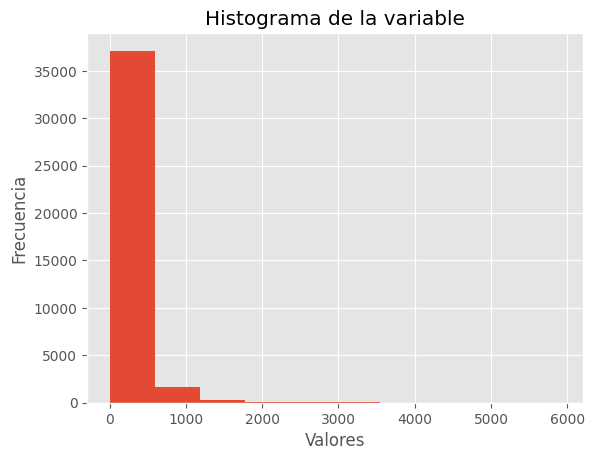

In [6]:
# Generar el histograma
plt.hist(df_TotalQuantity, bins=10)  # Puedes ajustar el número de 'bins' según tus necesidades

# Configurar etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable')

# Mostrar el histograma
plt.show()

In [7]:
# Agrupación arbitraria

# Definir una función que asigna el valor de 'tipo_cliente' según la condición
def asignar_tipo_cliente(row):
    if row['TotalQuantity'] <= 100:
        return 0
    else:
        return 1

# Aplicar la función a cada fila del DataFrame y crear la nueva variable 'tipo_cliente'
df['tipo_cliente'] = df.apply(asignar_tipo_cliente, axis=1)

# Verificar los resultados
print(df['tipo_cliente'])


0          1
1          1
2          1
3          1
4          1
          ..
1030621    1
1030622    1
1030623    1
1030624    1
1030625    1
Name: tipo_cliente, Length: 1030626, dtype: int64


In [8]:
# Distriución de la variable tipo_cliente

df.groupby('tipo_cliente').tipo_cliente.count().sort_values(ascending=False)

tipo_cliente
1    876610
0    154016
Name: tipo_cliente, dtype: int64

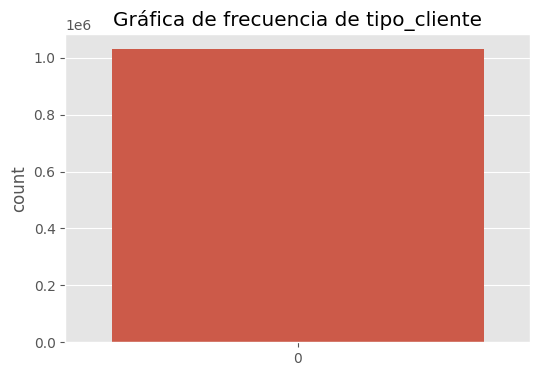

In [9]:
plt.figure(figsize=(6,4))

plt.title('Gráfica de frecuencia de tipo_cliente')
sns.countplot(df.tipo_cliente)

plt.show()

In [10]:
df.head(20)

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,...,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,tipo_cliente
0,489434,12,6.95,2009,12,1,7,2,2009.12,83.40,...,166,8,1,1,0,1,0,0,0,1
1,489434,12,6.75,2009,12,1,7,2,2009.12,81.00,...,166,8,2,1,0,1,0,0,0,1
2,489434,12,6.75,2009,12,1,7,2,2009.12,81.00,...,166,8,3,1,0,1,0,0,0,1
3,489434,48,2.10,2009,12,1,7,2,2009.12,100.80,...,166,8,4,1,0,1,0,0,0,1
4,489434,24,1.25,2009,12,1,7,2,2009.12,30.00,...,166,8,5,1,0,1,0,0,0,1
5,489434,24,1.65,2009,12,1,7,2,2009.12,39.60,...,166,8,6,1,0,1,0,0,0,1
6,489434,24,1.25,2009,12,1,7,2,2009.12,30.00,...,166,8,7,1,0,1,0,0,0,1
7,489434,10,5.95,2009,12,1,7,2,2009.12,59.50,...,166,8,8,1,0,1,0,0,0,1
8,489435,12,2.55,2009,12,1,7,2,2009.12,30.60,...,60,4,9,1,0,1,0,0,0,0
9,489435,12,3.75,2009,12,1,7,2,2009.12,45.00,...,60,4,10,1,0,1,0,0,0,0


## 2. Visualización de datos

### Variables de entrada

Visualización de una muestra representativa de los datos, dada las limitaciones de procesamiento

In [11]:
# DF de muestreo con todos los tipos de clientes
df_sample_all = df.sample(n=10000)  # Change 'n' to the desired sample size

df_sample_all.head()

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,...,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,tipo_cliente
89203,498133,2,2.51,2010,2,16,17,2,2010.02,5.02,...,765,416,510,1,0,1,0,0,0,1
704221,554765,2,7.95,2011,5,26,11,4,2011.05,15.90,...,131,22,310,1,0,1,0,0,0,1
275707,517384,1,4.25,2010,7,28,17,3,2010.07,4.25,...,344,65,183,1,0,1,0,0,0,1
1021740,580997,6,2.08,2011,12,6,17,2,2011.12,12.48,...,325,70,4896,1,0,1,0,0,0,1
331649,523014,1,13.57,2010,9,20,10,1,2010.09,13.57,...,264,132,3478,1,0,1,0,0,0,1


In [12]:
# DF de muestreo solo con clientes de tipo mayorista
df_sample_mayorista = df.loc[df['tipo_cliente'] == 1].sample(n=10000)  # Change 'n' to the desired sample size

df_sample_mayorista.head()

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,...,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,tipo_cliente
644565,548701,12,1.25,2011,4,3,11,7,2011.04,15.0,...,219,35,1081,1,0,1,0,0,0,1
227263,512400,5,2.10,2010,6,15,12,2,2010.06,10.5,...,467,35,3228,1,0,1,0,0,0,1
959519,576592,2,3.75,2011,11,15,14,2,2011.11,7.5,...,256,91,4293,1,0,1,0,0,0,1
343184,524111,36,1.45,2010,9,27,13,1,2010.09,52.2,...,380,12,4015,7,0,1,0,0,0,1
815993,565129,4,1.25,2011,9,1,12,4,2011.09,5.0,...,251,87,4266,1,0,1,0,0,0,1


In [13]:
# DF de muestreo solo con clientes de tipo minorista
df_sample_minorista = df.loc[df['tipo_cliente'] == 0].sample(n=10000)  # Change 'n' to the desired sample size

df_sample_minorista.head()

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,...,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,tipo_cliente
98067,499220,1,1.25,2010,2,25,11,4,2010.02,1.25,...,57,43,926,1,0,1,0,0,0,0
875724,569948,12,1.25,2011,10,6,18,4,2011.10,15.00,...,94,8,1343,1,0,1,0,0,0,0
571550,541845,3,1.25,2011,1,23,12,7,2011.01,3.75,...,67,39,3451,1,0,1,0,0,0,0
275252,517339,2,1.25,2010,7,28,13,3,2010.07,2.50,...,80,31,3583,1,0,1,0,0,0,0
925192,574016,1,2.10,2011,11,2,12,3,2011.11,2.10,...,46,18,4201,1,0,1,0,0,0,0


In [14]:
# Definición variables de entrada y variable de salida

df_inputs= df.drop(columns=['TotalTransaction'])

df_output = df[['TotalTransaction']].copy()

In [15]:
df_inputs.head(10)

,Invoice,Quantity,Price,Year,Months,Month_day,Time_hour,wk_day,year_month,TotalSpent,TotalQuantity,TotalProductosUnicos,CodigoUnico,CountryUnico,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,tipo_cliente
0,489434,12,6.95,2009,12,1,7,2,2009.12,83.4,166,8,1,1,0,1,0,0,0,1
1,489434,12,6.75,2009,12,1,7,2,2009.12,81.0,166,8,2,1,0,1,0,0,0,1
2,489434,12,6.75,2009,12,1,7,2,2009.12,81.0,166,8,3,1,0,1,0,0,0,1
3,489434,48,2.10,2009,12,1,7,2,2009.12,100.8,166,8,4,1,0,1,0,0,0,1
4,489434,24,1.25,2009,12,1,7,2,2009.12,30.0,166,8,5,1,0,1,0,0,0,1
5,489434,24,1.65,2009,12,1,7,2,2009.12,39.6,166,8,6,1,0,1,0,0,0,1
6,489434,24,1.25,2009,12,1,7,2,2009.12,30.0,166,8,7,1,0,1,0,0,0,1
7,489434,10,5.95,2009,12,1,7,2,2009.12,59.5,166,8,8,1,0,1,0,0,0,1
8,489435,12,2.55,2009,12,1,7,2,2009.12,30.6,60,4,9,1,0,1,0,0,0,0
9,489435,12,3.75,2009,12,1,7,2,2009.12,45.0,60,4,10,1,0,1,0,0,0,0


In [16]:
df_output.head(10)

,TotalTransaction
0,505.3
1,505.3
2,505.3
3,505.3
4,505.3
5,505.3
6,505.3
7,505.3
8,145.8
9,145.8


### Variable de salida

In [17]:
# Distriución de la variable de salida

df.groupby('TotalTransaction').TotalTransaction.count().sort_values(ascending=False)

TotalTransaction
16446.80    1350
14537.30    1302
12587.72    1202
14670.90    1194
14514.16    1186
            ... 
308.82         1
322.69         1
326.10         1
0.35           1
38970.00       1
Name: TotalTransaction, Length: 27165, dtype: int64

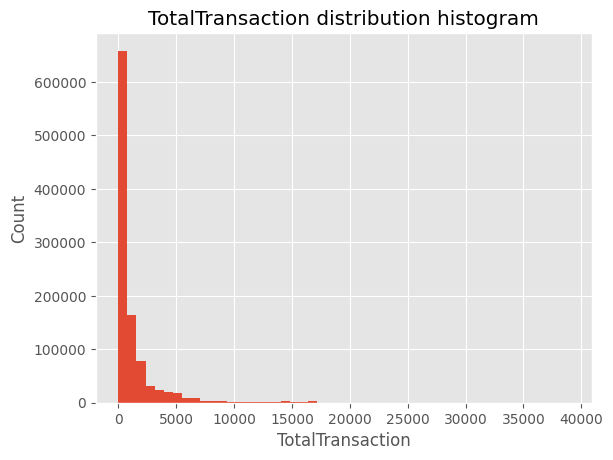

In [18]:
# Se visualiza la variable de salida
plt.hist(df['TotalTransaction'], bins=50)
plt.xlabel('TotalTransaction')
plt.ylabel('Count')
plt.title('TotalTransaction distribution histogram')
plt.show()

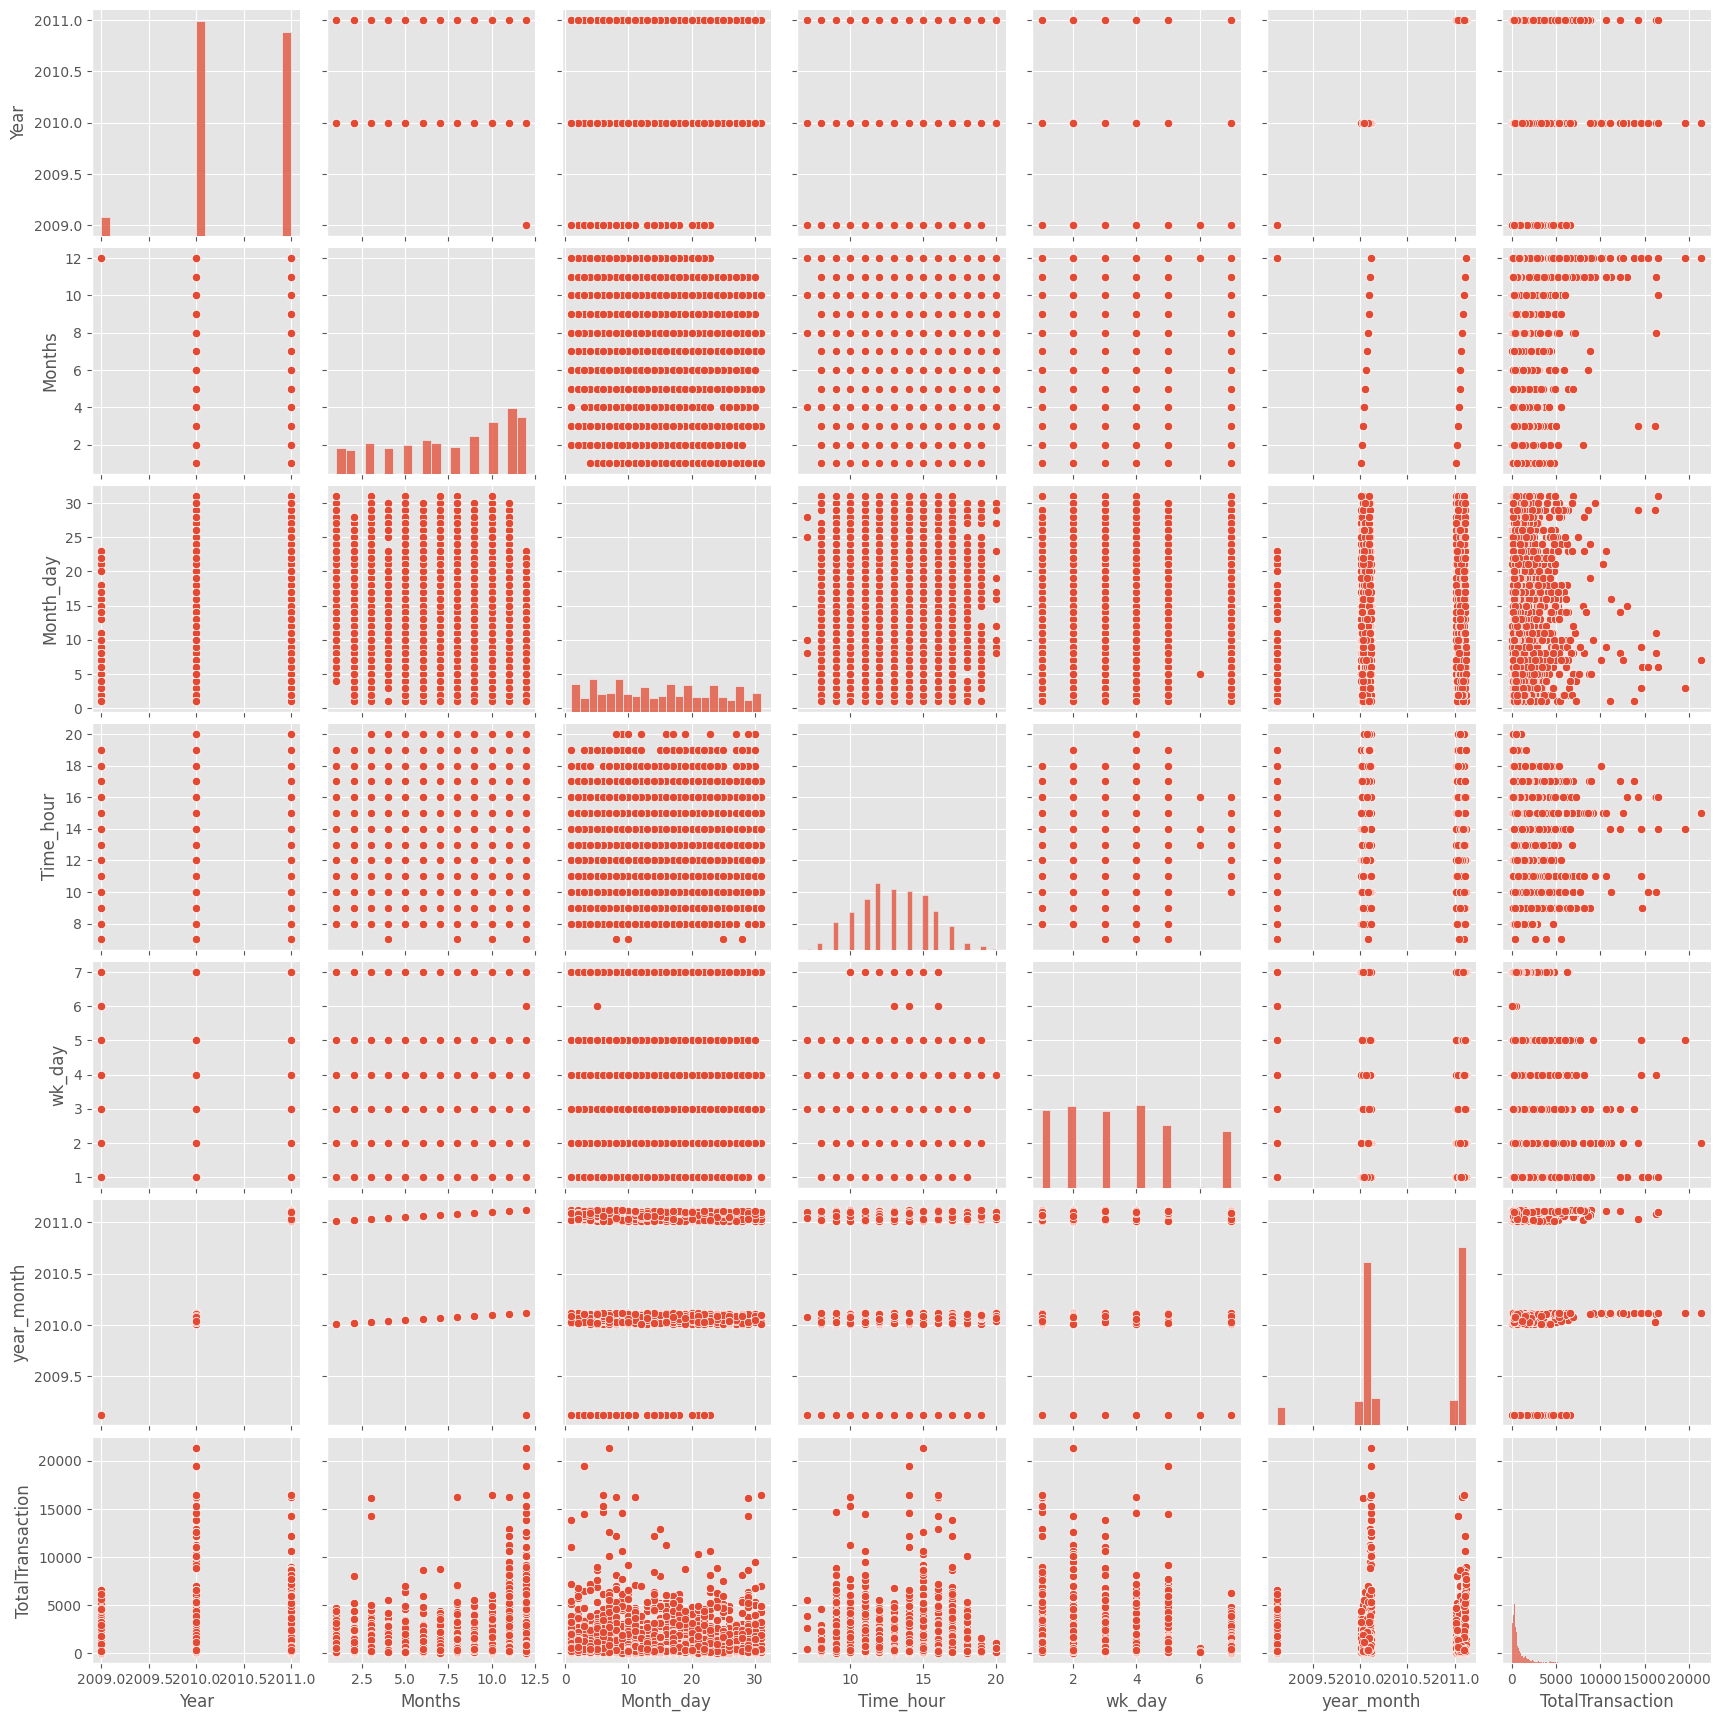

In [20]:
# Visualización de variables temporales versus variable objetivo "TotalTransaction"
sns.pairplot(df_sample_all[['Year','Months', 'Month_day','Time_hour','wk_day','year_month','TotalTransaction']])

In [21]:
# Visualización de variables geograficas versus variable objetivo "TotalTransaction"
sns.pairplot(df_sample_all[['Quantity','Price','TotalSpent','TotalProductosUnicos','TotalQuantity','TotalTransaction']])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f1ec10412d0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
#Histográma y caja de bigotes del TotalTransaction

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('TotalTransaction Distribution Plot')
sns.distplot(df_sample_all.Price)

plt.subplot(1,2,2)
plt.title('TotalTransaction Spread')
sns.boxplot(x=df_sample_all.Price)

plt.show()

## 3. Creación del modelo (Todos los clientes)

In [22]:
# Definición variables de entrada y variable de salida

df_inputs_all= df_sample_all.drop(columns=['TotalTransaction'])

df_output_all = df_sample_all[['TotalTransaction']].copy()

### 3.1 Arboles Simples Variables

In [ ]:
# Creación de variables para el test y el train

TiempoEntrenamientoTRAIN=[]
TiempoEvaluacionTRAIN=[]
RMSETrain=[]
R2Train=[]
MSETrain=[]
MAETrain=[]
nameColum=[]

TiempoEntrenamientoTEST=[]
TiempoEvaluacionTEST=[]
RMSETest=[]
R2Test=[]
MSETest=[]
MAETest=[]

In [49]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

Cantidad = 20

for i in range(Cantidad):

  # Hyperparameters.
  max_depth = 5
  minsamplesplit = 5
  minsampleleaf = 5

  param_grid = {"model__max_depth": list(range(1, max_depth + 1)),
                "model__min_samples_split": list(range(1, minsamplesplit + 1)),
                "model__min_samples_leaf": list(range(1, minsampleleaf + 1))}

  #param_grid = {"model__min_samples_split": list(range(1, minsamplesplit + 1)),
  #              "model__min_samples_leaf": list(range(1, minsampleleaf + 1))}

  # Loading the data.
  train_features = df_inputs_all.iloc[:,i]
  targets = df_output_all.iloc[:,0]

  NameVariable = df_inputs_all.columns[i]

  # Train, test split.
  data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
  X_train, X_test, targets_train, targets_test = data_split

  # Getting the target.
  y_train = targets_train
  y_test = targets_test

  # Model definition.
  pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                    ("model", DecisionTreeRegressor(random_state=4444))])
  # By default GridSearchCV uses a 5-kfold validation strategy.
  search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)  
  search.fit(X_train.values.reshape(-1, 1), y_train.values)

  # Getting the test score.
  y_hat_test = search.predict(X_test.values.reshape(-1, 1))
  test_score = r2_score(y_test.values, y_hat_test)

  # Printing stats.
  print(f"Columna: {NameVariable}")
  print(f"Best CV score: {search.best_score_:0.3f}")
  print(f"Best Parameters:\n {search.best_params_}")
  print(f"Test score: {test_score:0.3f}")
  print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: Invoice
Best CV score: 0.295
Best Parameters:
 {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Test score: 0.281

Columna: Quantity
Best CV score: 0.013
Best Parameters:
 {'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}
Test score: 0.023

Columna: Price
Best CV score: 0.134
Best Parameters:
 {'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}
Test score: 0.156

Columna: Year
Best CV score: 0.001
Best Parameters:
 {'model__max_depth': 1, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Test score: 0.001

Columna: Months
Best CV score: 0.105
Best Parameters:
 {'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Test score: 0.133

Columna: Month_day
Best CV score: 0.021
Best Parameters:
 {'model__max_depth': 4, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Test 

### 3.1 Arboles Multiples Variables

In [25]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

# Hyperparameters.
max_depth = 2
minsamplesplit = 2
minsampleleaf = 2

param_grid = {"model__max_depth": list(range(1, max_depth + 1)),
               "model__min_samples_split": list(range(1, minsamplesplit + 1)),
               "model__min_samples_leaf": list(range(1, minsampleleaf + 1))}

#param_grid = {"model__min_samples_split": list(range(1, minsamplesplit + 1)),
#              "model__min_samples_leaf": list(range(1, minsampleleaf + 1))}

# Loading the data.
train_features = df_inputs_all
targets = df_output_all

# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", DecisionTreeRegressor(random_state=4444))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print(f"Test score: {test_score:0.3f}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: TotalTransaction
Best CV score: 0.717
Best Parameters:
 {'model__max_depth': 2, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Test score: 0.761

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 0.02496161460876465 Minutos ---


### 3.2 Bosques Simples Variables

In [57]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

Cantidad = 3

 # Hyperparameters.
param_gride = {"model__max_depth": [2,3],
              "model__min_samples_split": [2,3],
              "model__min_samples_leaf": [2,3],
              "model__n_estimators": [50]}

for i in range(Cantidad):

   # Loading the data.
  train_features = df_inputs_all.iloc[:,i]
  targets = df_output_all.iloc[:,0]

  NameVariable = df_inputs_all.columns[i]

  # Train, test split.
  data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
  X_train, X_test, targets_train, targets_test = data_split

  # Getting the target.
  y_train = targets_train
  y_test = targets_test

  # Model definition.
  pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                    ("model", RandomForestRegressor(random_state=4444))])
  # By default GridSearchCV uses a 5-kfold validation strategy.
  search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)  
  search.fit(X_train.values.reshape(-1, 1), y_train.values)

  # Getting the test score.
  y_hat_test = search.predict(X_test.values.reshape(-1, 1))
  test_score = r2_score(y_test.values, y_hat_test)

  # Printing stats.
  print(f"Columna: {NameVariable}")
  print(f"Best CV score: {search.best_score_:0.3f}")
  print(f"Best Parameters:\n {search.best_params_}")
  print(f"Test score: {test_score:0.3f}")
  print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: Invoice
Best CV score: 0.346
Best Parameters:
 {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 3}
Test score: 0.352

Columna: Quantity
Best CV score: 0.018
Best Parameters:
 {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}
Test score: 0.032

Columna: Price
Best CV score: 0.143
Best Parameters:
 {'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}
Test score: 0.164

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 7.1065736134847 Minutos ---


### 3.2 Bosques Multiples Variables

In [55]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

# Hyperparameters.

param_gride = {"model__max_depth": [2,3],
              "model__min_samples_split": [2,3],
              "model__min_samples_leaf": [2,3],
              "model__n_estimators": [50]}

#param_gride = {"model__max_depth": [5,10,15,20,25,50],
#              "model__min_samples_split": [2,3,4,5,6,7,8,9,10],
#              "model__min_samples_leaf": [2,3,4,5,10,25,50],
#              "model__n_estimators": [250]}


# Loading the data.
train_features = df_inputs_all
targets = df_output_all

# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", RandomForestRegressor(random_state=4444,n_jobs=-1))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(estimator=pipe, param_grid = param_gride, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Test score: {test_score:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))


-------------------INICIO PROCESAMIENTO-----------------
Columna: TotalTransaction
Best CV score: 0.880
Test score: 0.884
Best Parameters:
 {'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 50}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 0.3898094058036804 Minutos ---


### 3.3 SVM Simples Variables

### 3.3 SVM Multiples Variables

In [62]:
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

# Hyperparameters.

param_gride = {"model__kernel": ['poly'],
              "model__gamma": ['scale'],
              "model__degree": [1],
              "model__epsilon": [0.0001],
              "model__C":  [1]}

#param_gride = {"model__kernel": ['poly','rbf'],
#              "model__gamma": ['scale','auto'],
#              "model__degree": [1,2,3,4,5],
#              "model__epsilon": [0.0001,0.00025,0.005,0.001,0.01,0.05, 0.1, 0.5, 1],
#              "model__C":  [1, 5, 10, 25, 50, 100]}

# Loading the data.
train_features = df_inputs_all
targets = df_output_all

# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", SVR())])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(estimator=pipe, param_grid = param_gride, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Test score: {test_score:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: TotalTransaction
Best CV score: -0.079
Test score: -0.084
Best Parameters:
 {'model__C': 1, 'model__degree': 1, 'model__epsilon': 0.0001, 'model__gamma': 'scale', 'model__kernel': 'poly'}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 0.24740296602249146 Minutos ---
